# Microsoft Movie Studios Data Analysis

In [1]:
# Here is the template I am following for the final Jupyter Notebook: 
# Link: https://github.com/learn-co-curriculum/dsc-project-template/blob/example-aab/animal_shelter_needs_analysis.ipynb

## Overview

In [2]:
#overview of project goes here

## Business Problem

In [ ]:
#business problem goes here

# Importing Libraries & Specifying File Paths

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
# Specifying all file paths in one centralized location.
tn_budgets_file_path = './../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz'
imdb_file_path = './../Data/Phase_1_Project_Data/im.db'

## Data Understanding

In [10]:
#Loading in datasets for runtime analysis
#Using pandas to create a dataframe from the tn.movie_budgets csv file
tn_budgets_df = pd.read_csv(tn_budgets_file_path)

In [5]:
# ensuring that the file was loaded correctly
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# creating a sqlite3 connection to be able to read in our SQL database 
conn = sqlite3.connect(imdb_file_path) 

# using pandas to read in our SQL database im.db
# SELECT * because we need to see what tables are in this database
imdb_db = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)

In [7]:
# take a look at our dataframe to make sure it was read correctly
imdb_db

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [8]:
# Create a dataframe with the columns needed from the movie_basics table
imdb_table = pd.read_sql('''
                            SELECT
                               movie_basics.movie_id, movie_basics.primary_title, movie_basics.runtime_minutes
                               FROM movie_basics
                               INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
                                WHERE is_original_title != 0.0
                               ''', conn)

In [9]:
# take a look at our dataframe to make sure it was read correctly
imdb_table.head()

,movie_id,primary_title,runtime_minutes
0,tt0369610,Jurassic World,124.0
1,tt0401729,John Carter,132.0
2,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,52.0
3,tt10027708,Miguelito,94.0
4,tt10050722,Thing I Don't Get,71.0


In [27]:
# Writer/Director Data Understanding Starts:
movie_basics_table = pd.read_sql('''
                               SELECT 
                               movie_basics.movie_id,movie_basics.primary_title
                               FROM movie_basics
                               INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
                               WHERE is_original_title != 0.0
                               ''', conn)

In [28]:
movie_basics_table.head()

,movie_id,primary_title
0,tt0369610,Jurassic World
1,tt0401729,John Carter
2,tt10010134,Versailles Rediscovered - The Sun King's Vanis...
3,tt10027708,Miguelito
4,tt10050722,Thing I Don't Get


In [29]:
persons_table = pd.read_sql('''
                               SELECT
                               person_id,primary_name,death_year
                               FROM persons
                               ''', conn)

In [30]:
persons_table.head()

,person_id,primary_name,death_year
0,nm0061671,Mary Ellen Bauder,NaN
1,nm0061865,Joseph Bauer,NaN
2,nm0062070,Bruce Baum,NaN
3,nm0062195,Axel Baumann,NaN
4,nm0062798,Pete Baxter,NaN


In [31]:
writers_table = pd.read_sql('''
                               SELECT
                               *
                               FROM writers
                               ''', conn)

In [32]:
writers_table.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [33]:
writers_df = pd.merge(writers_table, persons_table,left_on='person_id',right_on='person_id')

In [34]:
writers_df.head()

,movie_id,person_id,primary_name,death_year
0,tt0285252,nm0899854,Tony Vitale,NaN
1,tt0438973,nm0175726,Steve Conrad,NaN
2,tt2358925,nm0175726,Steve Conrad,NaN
3,tt2543472,nm0175726,Steve Conrad,NaN
4,tt0359950,nm0175726,Steve Conrad,NaN


In [35]:
writers_df = pd.merge(writers_df,movie_basics_table,left_on='movie_id',right_on='movie_id')

In [36]:
writers_df.head()

,movie_id,person_id,primary_name,death_year,primary_title
0,tt0285252,nm0899854,Tony Vitale,NaN,Life's a Beach
1,tt2358925,nm0175726,Steve Conrad,NaN,Unfinished Business
2,tt2543472,nm0175726,Steve Conrad,NaN,Wonder
3,tt2543472,nm2113666,Jack Thorne,NaN,Wonder
4,tt2543472,nm0154716,Stephen Chbosky,NaN,Wonder


In [37]:
writers_df = pd.merge(tn_budgets_df,writers_df, how='inner',left_on='movie',right_on='primary_title')

In [44]:
directors_table = pd.read_sql('''
                               SELECT
                               *
                               FROM directors
                               ''', conn)

In [45]:
directors_table.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [46]:
directors_df = pd.merge(directors_table, persons_table,left_on='person_id',right_on='person_id')

In [47]:
directors_df = pd.merge(directors_df,movie_basics_table,left_on='movie_id',right_on='movie_id')

In [48]:
directors_df.head()

,movie_id,person_id,primary_name,death_year,primary_title
0,tt0285252,nm0899854,Tony Vitale,NaN,Life's a Beach
1,tt0835418,nm0151540,Jay Chandrasekhar,NaN,The Babymakers
2,tt0835418,nm0151540,Jay Chandrasekhar,NaN,The Babymakers
3,tt0859635,nm0151540,Jay Chandrasekhar,NaN,Super Troopers 2
4,tt0859635,nm0151540,Jay Chandrasekhar,NaN,Super Troopers 2


In [49]:
directors_df = pd.merge(tn_budgets_df,directors_df, how='inner',left_on='movie',right_on='primary_title')

# Data cleaning and preparation

In [11]:
# Cleaning the production_budget column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget'].str.replace(",","")
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].str[1:]
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].astype(float)

In [12]:
# Cleaning the domestic_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross'].str.replace(",","")
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].str[1:]
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].astype(float)

In [13]:
# Cleaning the worldwide_gross column by removing all of the commas and the dollar sign then converting the 
# value to a float
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross'].str.replace(",","")
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].str[1:]
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].astype(float)

In [14]:
# Deleting all the rows that have a value of zero in the columns 'production_budget_float','worldwide_gross_float' 
# or 'domestic_gross_float'
tn_budgets_df = tn_budgets_df[tn_budgets_df['production_budget_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['worldwide_gross_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['domestic_gross_float'] != 0]

#sanity check
#tn_budgets_df.loc[tn_budgets_df['domestic_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['worldwide_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['production_budget_float'] == 0]

In [15]:
# creating a new column named 'net_income' that is equal to the worldwide gross minus the production budget
tn_budgets_df['net_income'] = tn_budgets_df['worldwide_gross_float'] - tn_budgets_df['production_budget_float']

In [16]:
# Taking a look at tn_budgets_df
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [17]:
# Joining the data frams 'tn_budgets_df and 'imdb_table' on the movie title
title_and_revenue_df = pd.merge(tn_budgets_df, imdb_table,left_on='movie',right_on='primary_title')
title_and_revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,movie_id,primary_title,runtime_minutes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,149.0


In [18]:
# Here I am dropping all the rows in our dataframe where 'net_income' is NAN
title_and_revenue_df = title_and_revenue_df.dropna(subset=['net_income'])

# Here I am dropping all the duplicates
title_and_revenue_df = title_and_revenue_df.drop_duplicates(subset='movie')

#sanity checks
#title_and_revenue_df['movie'].value_counts()
#title_and_revenue_df['movie'].isnull().sum()

In [38]:
#Director/Writer Data Cleaning and Preparation Start:
# Here I am dropping all the rows in our dataframe where 'movie' is NAN
writers_df = writers_df.dropna(subset=['movie'])

# Here I am dropping all the duplicates
writers_df = writers_df.drop_duplicates(subset='movie')

#sanity checks
#writers_df['movie'].value_counts()
#writers_df['movie'].isnull().sum()


In [39]:
# Need to ensure that the writers are still alive
# Dropping all rows where death_year != Nan
writers_df = writers_df.loc[writers_df['death_year'].isna()]

In [40]:
print(len(writers_df))
print(writers_df['death_year'].isna().sum())

1628
1628


In [41]:
new_writers = writers_df.groupby(by=['primary_name'],as_index=False).mean()

In [42]:
new_writers = new_writers.sort_values(by=['net_income'],ascending=False)
new_writers.head()
new_writers = new_writers[:10]

In [51]:
# Here I am dropping all the rows in our dataframe where 'movie' is NAN
directors_df = directors_df.dropna(subset=['movie'])

# Here I am dropping all the duplicates
directors_df = directors_df.drop_duplicates(subset='movie')

#sanity checks
#directors_df['movie'].value_counts()
#directors_df['movie'].isnull().sum()

In [53]:
# Need to ensure that the directors are still alive
# Dropping all rows where death_year != Nan
directors_df = directors_df.loc[directors_df['death_year'].isna()]

In [54]:
print(len(directors_df))
print(directors_df['death_year'].isna().sum())

1726
1726


In [55]:
new_directors = directors_df.groupby(by=['primary_name'],as_index=False).mean()

In [56]:
new_directors.head()

,primary_name,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,death_year
0,Aaron Alon,79.000000,2.100000e+06,8.818240e+05,1.381824e+06,-7.181760e+05,NaN
1,Aashiq Abu,69.000000,7.500000e+07,1.401069e+07,3.062669e+07,-4.437331e+07,NaN
2,Abeer Zeibak Haddad,33.000000,1.200000e+07,8.700670e+05,9.947900e+05,-1.100521e+07,NaN
3,Adam Carolla,2.000000,1.500000e+06,1.131690e+05,1.131690e+05,-1.386831e+06,NaN
4,Adam McKay,69.333333,5.933333e+07,1.056109e+08,1.587617e+08,9.942833e+07,NaN


In [57]:
new_directors = new_directors.sort_values(by=['net_income'],ascending=False)
new_directors = new_directors[:10]
new_directors.head()

,primary_name,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,death_year
91,Atsushi Wada,1.000000,425000000.0,760507625.0,2.776345e+09,2.351345e+09,NaN
581,Joss Whedon,15.500000,277800000.0,541142707.5,1.460475e+09,1.182675e+09,NaN
178,Chi-kin Kwok,56.000000,150000000.0,400738009.0,1.272470e+09,1.122470e+09,NaN
76,Anthony Russo,13.333333,240000000.0,448882263.0,1.300869e+09,1.060869e+09,NaN
875,Pierre Coffin,43.750000,73500000.0,305062360.0,9.284363e+08,8.549363e+08,NaN


# Analysis

In [6]:
# Here I am taking a look at the minimum & maximum values in the 'runtime_minutes' column
max_runtime = title_and_revenue_df['runtime_minutes'].max()
min_runtime = title_and_revenue_df['runtime_minutes'].min()

# Here I am creating a new series named run_time and sorting it, and taking a look at the min and max values
run_time = title_and_revenue_df['runtime_minutes']
run_time = run_time.sort_values(ascending=True)
print(run_time.head(10))
print(min_runtime,max_runtime)


Text(0.5, 1.0, 'Runtime vs Net Income')

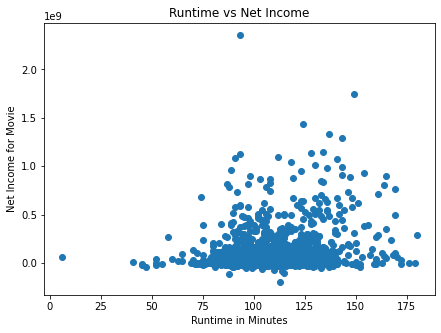

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x = title_and_revenue_df['runtime_minutes'],y = title_and_revenue_df['net_income'])
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Net Income for Movie')
ax.set_title('Runtime vs Net Income')
#plt.scatter(title_and_revenue_df['runtime_minutes'],title_and_revenue_df['gross_revenue']);

In [20]:
# Here I am taking a look at the rows where there wasa net loss
title_and_revenue_df.loc[title_and_revenue_df['net_income'] < 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,movie_id,primary_title,runtime_minutes
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,149762350.0,-200237650.0,tt6565702,Dark Phoenix,113.0
9,13,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115",275000000.0,89302115.0,260002115.0,-14997885.0,tt1210819,The Lone Ranger,150.0
87,11,"May 12, 2017",King Arthur: Legend of the Sword,"$175,000,000","$39,175,066","$139,630,336",175000000.0,39175066.0,139630336.0,-35369664.0,tt1972591,King Arthur: Legend of the Sword,126.0
88,12,"Dec 25, 2013",47 Ronin,"$175,000,000","$38,362,475","$151,716,815",175000000.0,38362475.0,151716815.0,-23283185.0,tt1335975,47 Ronin,128.0
119,47,"Sep 30, 2016",Deepwater Horizon,"$156,000,000","$61,433,527","$122,603,824",156000000.0,61433527.0,122603824.0,-33396176.0,tt1860357,Deepwater Horizon,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,90,"Jun 19, 2014",The Past is a Grotesque Animal,"$100,000","$20,056","$20,056",100000.0,20056.0,20056.0,-79944.0,tt3072636,The Past is a Grotesque Animal,77.0
2110,4,"Jul 25, 2014",Happy Christmas,"$70,000","$30,312","$30,312",70000.0,30312.0,30312.0,-39688.0,tt2955096,Happy Christmas,82.0
2111,11,"Jan 25, 2013",Supporting Characters,"$60,000","$4,917","$4,917",60000.0,4917.0,4917.0,-55083.0,tt1874789,Supporting Characters,87.0
2113,20,"Jul 31, 2015",Counting,"$50,000","$8,374","$8,374",50000.0,8374.0,8374.0,-41626.0,tt4462082,Counting,111.0


In [21]:
title_and_revenue_df.describe()

,id,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income,runtime_minutes
count,1740.000000,1.740000e+03,1.740000e+03,1.740000e+03,1.740000e+03,1706.000000
mean,50.706322,4.292035e+07,5.431984e+07,1.330817e+08,9.016131e+07,106.460727
std,28.411752,5.375829e+07,8.226420e+07,2.291933e+08,1.901902e+08,18.071670
min,1.000000,9.000000e+03,3.880000e+02,5.280000e+02,-2.002376e+08,6.000000
25%,26.750000,8.500000e+06,5.028911e+06,1.017489e+07,-7.216118e+05,94.000000
50%,50.000000,2.350000e+07,2.719857e+07,4.862847e+07,2.149148e+07,104.000000
75%,75.000000,5.212500e+07,6.446344e+07,1.436015e+08,9.171415e+07,116.750000
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09,180.000000


In [22]:
#binning by standard deviation, which you can see above - 18 minutes

def length(val):
    if val <= 18:
        return ">= 18 minutes"
    elif (val > 18) and (val <= 36):
        return "18 to 36 minutes"
    elif(val > 36) and (val <= 54):
        return "36 minutes to 54 minutes"
    elif (val > 54) and (val <= 72):
        return "54 minutes to 72 minutes"
    elif (val > 72) and (val <= 90):
        return "72 minutes to 90 minutes"
    elif (val > 90) and (val <= 108):
        return "90 minutes to 108 minutes"
    elif (val > 108) and (val <= 126):
        return "108 minutes to 126 minutes"
    elif (val > 126) and (val <= 144):
        return "126 minutes to 144 minutes"
    elif (val > 144) and (val <= 162):
        return "144 minutes to 162 minutes"
    elif (val > 162) and (val <= 180):
        return "162 minutes to 180 minutes"

In [23]:
# mapping runtime minutes to bins
title_and_revenue_df['runtime_minutes_binned'] = title_and_revenue_df['runtime_minutes'].map(length)

In [25]:
new_df = title_and_revenue_df.groupby(by=['runtime_minutes_binned'],as_index=False).mean()
new_df = new_df.sort_values(by='net_income',ascending=False)

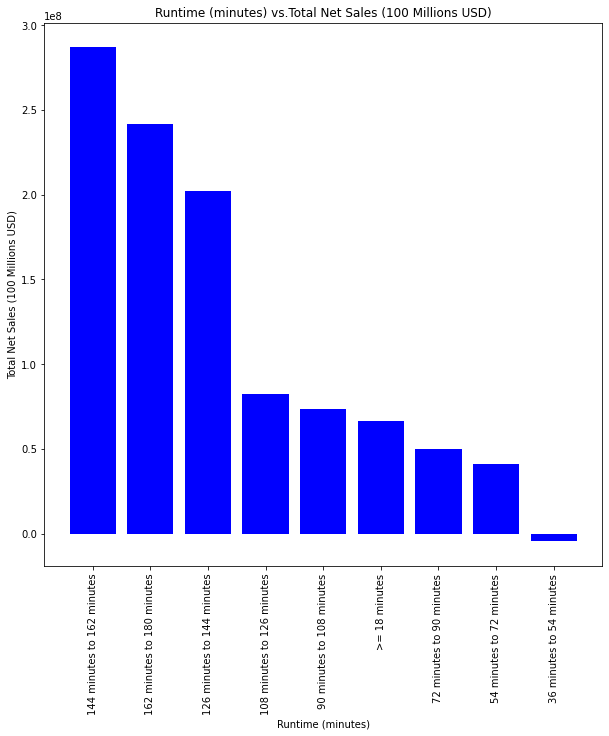

In [26]:
#plot these bins
fig,ax = plt.subplots(figsize = (10,10))
ax.bar(new_df['runtime_minutes_binned'],new_df['net_income'],color='blue')
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Total Net Sales (100 Millions USD)')
ax.set_title('Runtime (minutes) vs.Total Net Sales (100 Millions USD)')
plt.xticks(rotation=90);

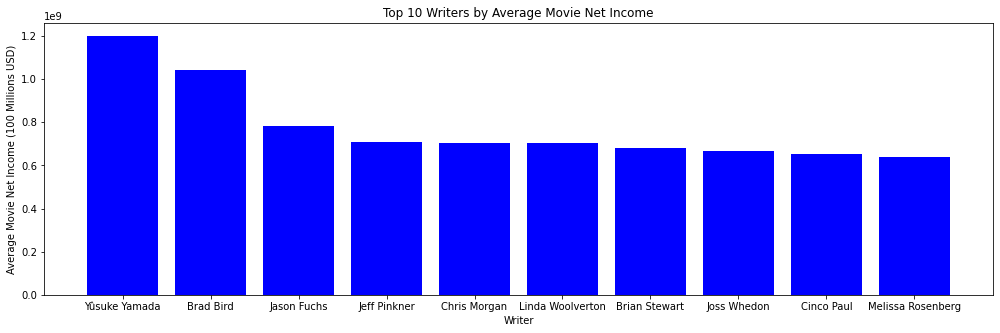

In [43]:
#Director/Writer Analysis Start:
fig,ax = plt.subplots(figsize=(17,5))
ax.bar(new_writers['primary_name'],new_writers['net_income'],color='blue')
ax.set_xlabel('Writer')
ax.set_ylabel('Average Movie Net Income (100 Millions USD)')
ax.set_title('Top 10 Writers by Average Movie Net Income');

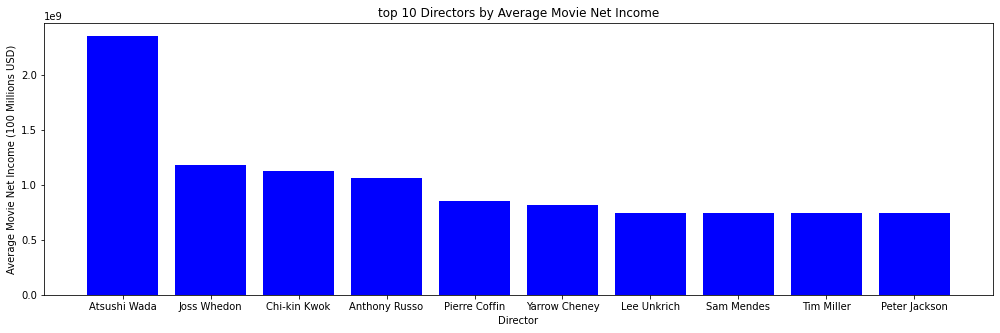

In [58]:
fig,ax = plt.subplots(figsize=(17,5))
ax.bar(new_directors['primary_name'],new_directors['net_income'],color='blue')
ax.set_xlabel('Director')
ax.set_ylabel('Average Movie Net Income (100 Millions USD)')
ax.set_title('top 10 Directors by Average Movie Net Income');

# Conclusions

# Next Steps